<a href="https://colab.research.google.com/github/notice4/bank-customer-churn-analytics/blob/main/notebooks/business_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/notice4/bank-customer-churn-analytics/refs/heads/main/data/bank_churn_dataset.csv')
data

,client_id,age,region,months_with_bank,balance,transactions_last_month,mobile_app_logins,support_calls,has_credit,has_deposit,service_fee,churn
0,1,56,Kutaisi,10,1552.13,78,30,0,0,0,0,0
1,2,69,Tbilisi,96,9848.44,85,12,5,0,0,5,0
2,3,46,Tbilisi,98,13604.78,93,25,5,1,0,0,0
3,4,32,Other,48,2531.24,106,43,6,0,0,5,0
4,5,60,Other,20,14524.90,39,11,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,33,Rustavi,76,4844.68,77,49,2,1,0,0,0
2996,2997,71,Tbilisi,7,3558.82,40,46,2,1,0,0,0
2997,2998,63,Rustavi,49,3939.50,81,25,3,0,0,0,0
2998,2999,69,Batumi,26,7566.32,50,0,1,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                3000 non-null   int64  
 1   age                      3000 non-null   int64  
 2   region                   3000 non-null   object 
 3   months_with_bank         3000 non-null   int64  
 4   balance                  3000 non-null   float64
 5   transactions_last_month  3000 non-null   int64  
 6   mobile_app_logins        3000 non-null   int64  
 7   support_calls            3000 non-null   int64  
 8   has_credit               3000 non-null   int64  
 9   has_deposit              3000 non-null   int64  
 10  service_fee              3000 non-null   int64  
 11  churn                    3000 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 281.4+ KB


In [5]:
data['region'].unique()

array(['Kutaisi', 'Tbilisi', 'Other', 'Batumi', 'Rustavi'], dtype=object)

In [6]:
data['region'] = data['region'].map({'Tbilisi': 0, 'Kutaisi': 1, 'Batumi': 2, 'Rustavi': 3, 'Other':4})
data

,client_id,age,region,months_with_bank,balance,transactions_last_month,mobile_app_logins,support_calls,has_credit,has_deposit,service_fee,churn
0,1,56,1,10,1552.13,78,30,0,0,0,0,0
1,2,69,0,96,9848.44,85,12,5,0,0,5,0
2,3,46,0,98,13604.78,93,25,5,1,0,0,0
3,4,32,4,48,2531.24,106,43,6,0,0,5,0
4,5,60,4,20,14524.90,39,11,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,33,3,76,4844.68,77,49,2,1,0,0,0
2996,2997,71,0,7,3558.82,40,46,2,1,0,0,0
2997,2998,63,3,49,3939.50,81,25,3,0,0,0,0
2998,2999,69,2,26,7566.32,50,0,1,0,1,0,0


Churn Correlations:
 churn                      1.000000
service_fee                0.244858
support_calls              0.194075
months_with_bank           0.028855
client_id                  0.006744
balance                    0.000565
has_deposit               -0.006382
age                       -0.014449
has_credit                -0.016507
region                    -0.031222
transactions_last_month   -0.076291
mobile_app_logins         -0.276287
Name: churn, dtype: float64


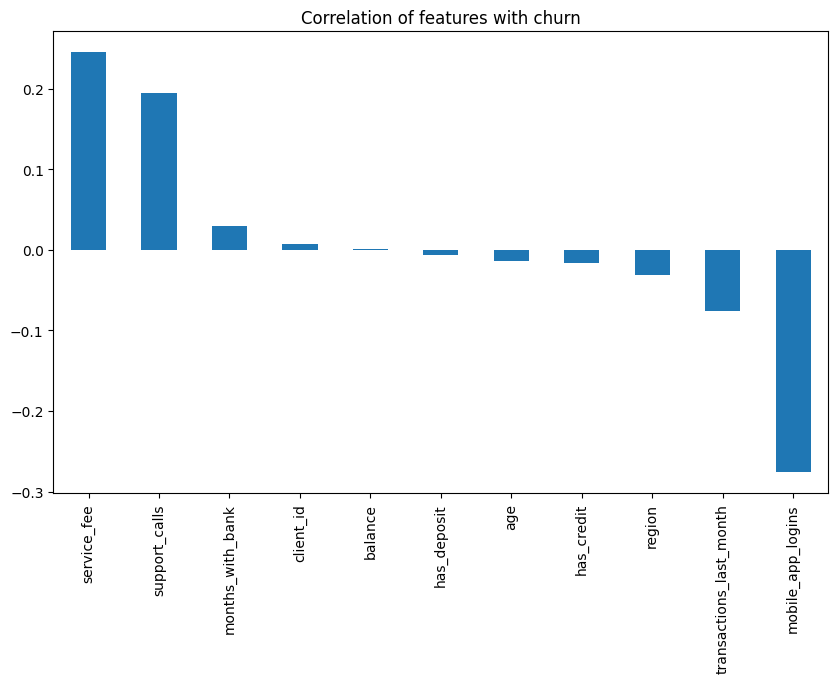

In [8]:
corr = data.corr()["churn"].sort_values(ascending=False)
print("Churn Correlations:\n", corr)

plt.figure(figsize=(10,6))
corr.drop("churn").plot(kind="bar")
plt.title("Correlation of features with churn")
plt.show()

/tmp/ipython-input-4023825294.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_churn = data.groupby("activity_level")["churn"].mean()


activity_level
Low       0.333333
Medium    0.074286
High      0.066905
Name: churn, dtype: float64


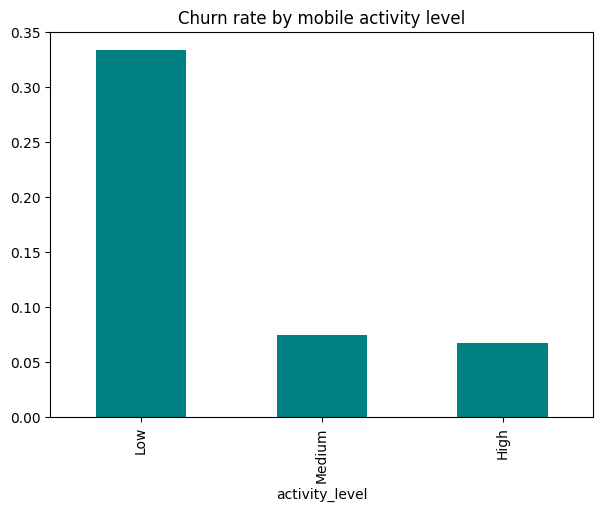

In [12]:
data["activity_level"] = pd.cut(
    data["mobile_app_logins"],
    bins=[-1, 10, 30, 100],
    labels=["Low", "Medium", "High"]
)

segment_churn = data.groupby("activity_level")["churn"].mean()
print(segment_churn)

plt.figure(figsize=(7,5))
segment_churn.plot(kind="bar", color="teal")
plt.title("Churn rate by mobile activity level")
plt.show()

In [13]:
high_risk = data[
    (data["mobile_app_logins"] < 10) &
    (data["transactions_last_month"] < 20) &
    (data["service_fee"] > 300)
]

print("High Risk Customer Count:", len(high_risk))
high_risk.head()

High Risk Customer Count: 0


,client_id,age,region,months_with_bank,balance,transactions_last_month,mobile_app_logins,support_calls,has_credit,has_deposit,service_fee,churn,activity_level


In [11]:
recommendations = """
1. Reduce service fees for low-activity customers.
2. Promote mobile banking adoption with app onboarding programs.
3. Offer loyalty rewards for increasing monthly transactions.
4. Proactive outreach to customers with high support call volume.
5. Create a credit/deposit product bundle for cross-selling.
"""

print(recommendations)


1. Reduce service fees for low-activity customers.
2. Promote mobile banking adoption with app onboarding programs.
3. Offer loyalty rewards for increasing monthly transactions.
4. Proactive outreach to customers with high support call volume.
5. Create a credit/deposit product bundle for cross-selling.

